In [1]:
import pandas as pd

In [2]:
filepath= 'gs://my-bucket-mpat/cleaned/Final_clean_data.parquet'

In [3]:
df=pd.read_parquet(filepath)

In [4]:
df.shape

(444817, 27)

In [5]:
df.isnull().sum()

track_name            0
artists_names         0
track_uri             0
track_popularity      0
artists_uris          0
playlist_uris         0
artist_popularity     0
artist_genres         0
artist_followers      0
playlist_name         0
query                 0
author                0
n_tracks              0
playlist_followers    0
danceability          0
instrumentalness      0
liveness              0
valence               0
energy                0
key                   0
speechiness           0
acousticness          0
num_samples           0
duration              0
loudness              0
tempo                 0
time_signature        0
dtype: int64

In [6]:
df.drop(['query','artist_genres','author','num_samples','playlist_followers'], axis=1, inplace=True)

In [7]:
df.isnull().sum()

track_name           0
artists_names        0
track_uri            0
track_popularity     0
artists_uris         0
playlist_uris        0
artist_popularity    0
artist_followers     0
playlist_name        0
n_tracks             0
danceability         0
instrumentalness     0
liveness             0
valence              0
energy               0
key                  0
speechiness          0
acousticness         0
duration             0
loudness             0
tempo                0
time_signature       0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

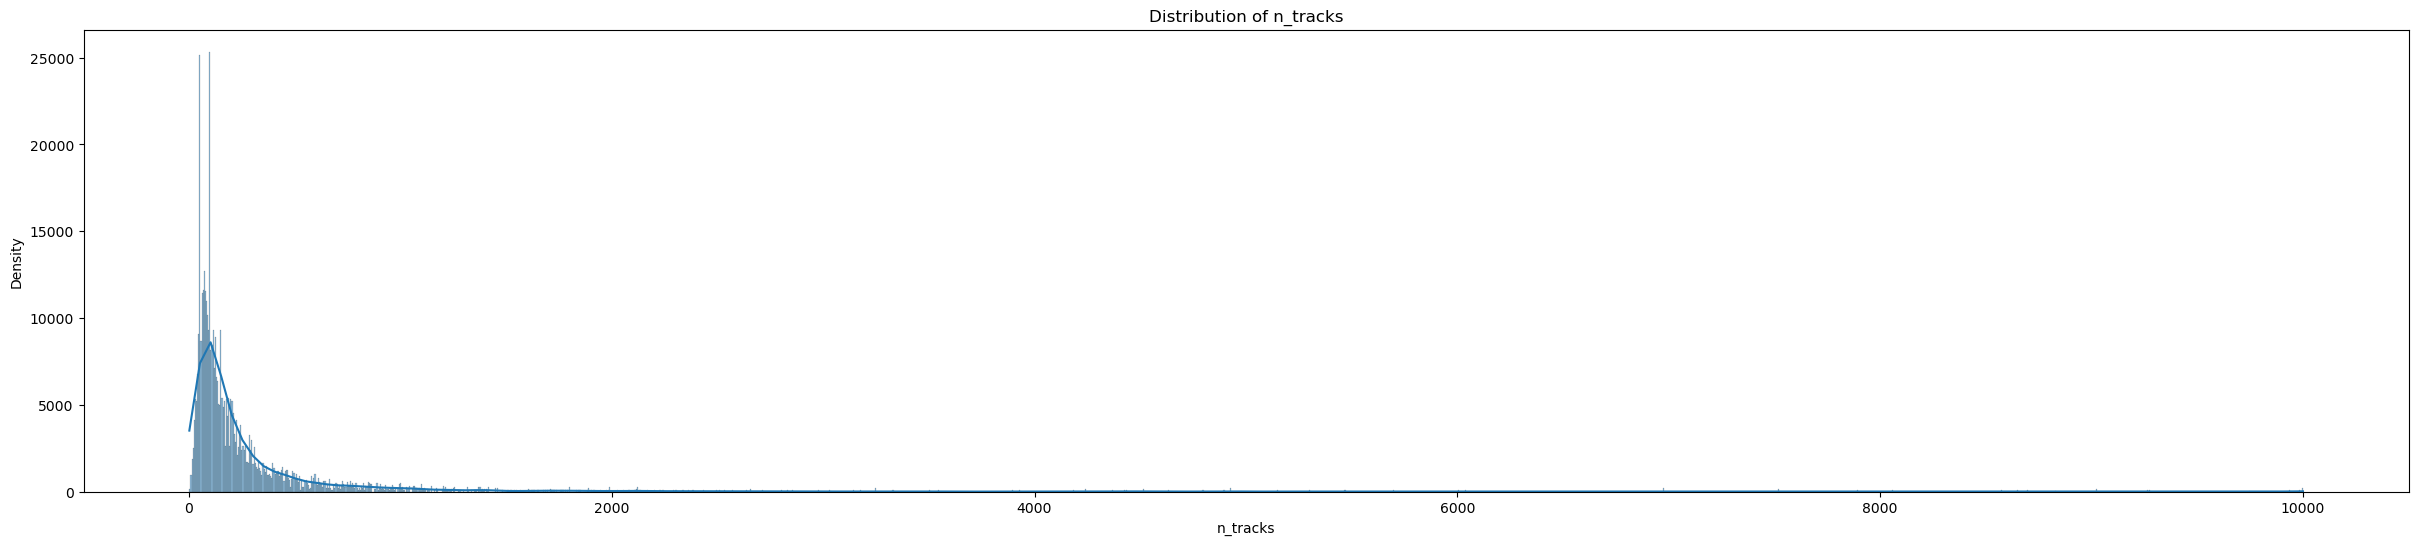

In [9]:
plt.figure(figsize=(30, 6))
sns.histplot(df['n_tracks'], kde=True)
plt.title('Distribution of n_tracks')
plt.xlabel('n_tracks')
plt.ylabel('Density')
plt.show()

In [10]:
df = df[df['n_tracks'] >=6]

In [11]:
df

,track_name,artists_names,track_uri,track_popularity,artists_uris,playlist_uris,artist_popularity,artist_followers,playlist_name,n_tracks,...,liveness,valence,energy,key,speechiness,acousticness,duration,loudness,tempo,time_signature
0,DON'T LOOK DOWN (feat. Lizzy Land) - Acoustic,"['San Holo', 'Lizzy Land']",spotify:track:0wHwGDYc8nltuYykhZRKln,44,spotify:artist:0jNDKefhfSbLR9sFvcPLHo,spotify:playlist:1JvcIFP3w2EqpkZFo8LPSg,58,678573,very vibrant playlist (by San Holo) 💌💌,73.0,...,0.2310,0.257,0.340,8.0,0.0295,0.902,191.22580,-9.515,77.547,4.0
1,DON'T LOOK DOWN (feat. Lizzy Land) - Acoustic,"['San Holo', 'Lizzy Land']",spotify:track:0wHwGDYc8nltuYykhZRKln,44,spotify:artist:1Cg7AdS9hOJBqmGUdbQ6Ux,spotify:playlist:1JvcIFP3w2EqpkZFo8LPSg,53,10254,very vibrant playlist (by San Holo) 💌💌,73.0,...,0.2310,0.257,0.340,8.0,0.0295,0.902,191.22580,-9.515,77.547,4.0
2,DON'T LOOK DOWN (feat. Lizzy Land),"['San Holo', 'Lizzy Land']",spotify:track:5rIpzFDp0sYDCQytYDG96W,55,spotify:artist:0jNDKefhfSbLR9sFvcPLHo,spotify:playlist:37i9dQZF1DWX8l0PIEOYVj,58,678573,Bass Lounge,150.0,...,0.4500,0.294,0.712,8.0,0.0508,0.124,196.80000,-3.824,150.030,4.0
3,DON'T LOOK DOWN (feat. Lizzy Land),"['San Holo', 'Lizzy Land']",spotify:track:5rIpzFDp0sYDCQytYDG96W,55,spotify:artist:0jNDKefhfSbLR9sFvcPLHo,spotify:playlist:1JvcIFP3w2EqpkZFo8LPSg,58,678573,very vibrant playlist (by San Holo) 💌💌,73.0,...,0.4500,0.294,0.712,8.0,0.0508,0.124,196.80000,-3.824,150.030,4.0
4,DON'T LOOK DOWN (feat. Lizzy Land),"['San Holo', 'Lizzy Land']",spotify:track:5rIpzFDp0sYDCQytYDG96W,55,spotify:artist:1Cg7AdS9hOJBqmGUdbQ6Ux,spotify:playlist:37i9dQZF1DWX8l0PIEOYVj,53,10254,Bass Lounge,150.0,...,0.4500,0.294,0.712,8.0,0.0508,0.124,196.80000,-3.824,150.030,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526584,everything i wanted,"['Lofi Fruits Music', 'Avocuddle', 'Chill Frui...",spotify:track:3Fw8YgjtnYQ6Wllay1E5xN,0,spotify:artist:34b7j3TqM5ramjmt2mc8tB,spotify:playlist:0YRwLJw6oiPNk7vuhW9ybs,76,85026,"Sad lofi fruits 💔 lofi vocal pop to cry, sleep...",86.0,...,0.0829,0.235,0.124,9.0,0.0304,0.975,113.04594,-18.411,99.985,4.0
526585,April Showers,"['Lofi Fruits Music', 'Chill Fruits Music']",spotify:track:7jCgiRluh1ARw4kA82OOlF,49,spotify:artist:1dABGukgZ8XKKOdd2rVSHM,spotify:playlist:0YRwLJw6oiPNk7vuhW9ybs,77,869185,"Sad lofi fruits 💔 lofi vocal pop to cry, sleep...",86.0,...,0.1090,0.257,0.235,10.0,0.0286,0.923,108.89166,-21.065,107.998,4.0
526586,April Showers,"['Lofi Fruits Music', 'Chill Fruits Music']",spotify:track:7jCgiRluh1ARw4kA82OOlF,49,spotify:artist:34b7j3TqM5ramjmt2mc8tB,spotify:playlist:0YRwLJw6oiPNk7vuhW9ybs,76,85026,"Sad lofi fruits 💔 lofi vocal pop to cry, sleep...",86.0,...,0.1090,0.257,0.235,10.0,0.0286,0.923,108.89166,-21.065,107.998,4.0
526587,Warm Breeze,"['Lofi Fruits Music', 'Chill Fruits Music']",spotify:track:0eq1QHOM455t2uipFsWWPd,51,spotify:artist:1dABGukgZ8XKKOdd2rVSHM,spotify:playlist:0YRwLJw6oiPNk7vuhW9ybs,77,869185,"Sad lofi fruits 💔 lofi vocal pop to cry, sleep...",86.0,...,0.0823,0.164,0.216,11.0,0.0283,0.975,122.30780,-16.983,115.162,4.0


In [12]:
import pyarrow.parquet as pq
import pyarrow as pa
import gcsfs

patable = pa.Table.from_pandas(df)

gbucket = 'my-bucket-mpat'
gcs_path = 'gs://{}/cleaned/Final_clean_data2.parquet'.format(gbucket)

table = pa.Table.from_pandas(df)

files = gcsfs.GCSFileSystem()

# Write PyArrow Table to Parquet file on GCS
with files.open(gcs_path, 'wb') as f:
    pq.write_table(table, f)

In [20]:
features = ['danceability', 'instrumentalness', 'liveness', 'energy', 'valence', 
            'key', 'speechiness', 'time_signature', 'tempo', 'acousticness']

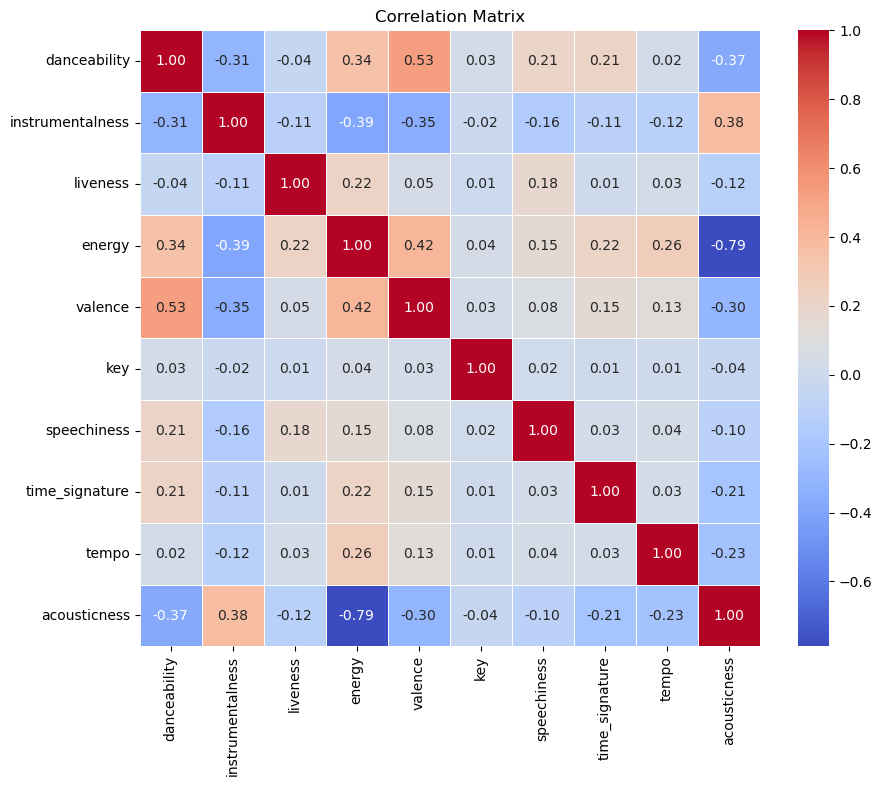

In [21]:
# Assuming you are using pandas DataFrame
correlation_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
print(correlation_matrix)

                  danceability  instrumentalness  liveness    energy  \
danceability          1.000000         -0.309536 -0.041144  0.344547   
instrumentalness     -0.309536          1.000000 -0.108115 -0.390718   
liveness             -0.041144         -0.108115  1.000000  0.221195   
energy                0.344547         -0.390718  0.221195  1.000000   
valence               0.526872         -0.352843  0.049474  0.418822   
key                   0.031523         -0.015905  0.006346  0.044693   
speechiness           0.208150         -0.157013  0.179490  0.151255   
time_signature        0.213339         -0.110235  0.011895  0.215084   
loudness              0.457217         -0.564713  0.135206  0.812530   
tempo                 0.022475         -0.116612  0.034391  0.260274   
acousticness         -0.370756          0.375599 -0.115426 -0.788128   

                   valence       key  speechiness  time_signature  loudness  \
danceability      0.526872  0.031523     0.208150       